In [1]:
%config Completer.use_jedi = False

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("C:\\Users\\ACER\\Data science path\\Jose lesson\\DATA\\OnlineRetail.csv")
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [5]:
#null value check
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
def plot_null(data):
    na_val = data.isnull().sum() *100 / len(data)
    plt.figure(figsize=(10,6))
    sns.barplot(x=na_val.index,y=na_val.values)
    plt.xlabel("columns")
    plt.ylabel("missing value percentage")
    plt.title("Missing value percentage in dataframe")
    
    return na_val,plt.show()

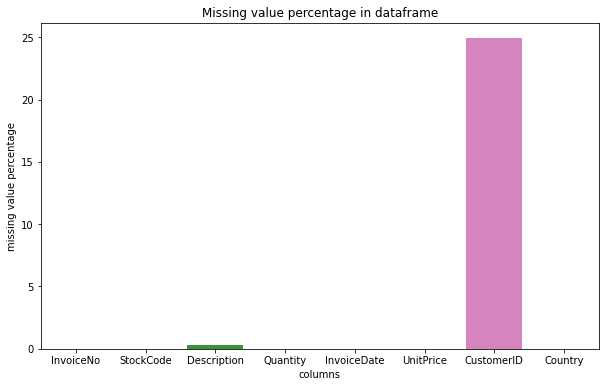

(InvoiceNo       0.000000
 StockCode       0.000000
 Description     0.268311
 Quantity        0.000000
 InvoiceDate     0.000000
 UnitPrice       0.000000
 CustomerID     24.926694
 Country         0.000000
 dtype: float64,
 None)

In [7]:
plot_null(df)

In [8]:
#dropping null customer id
df = df.drop(index=df.loc[df['CustomerID'].isnull()].index)
#no null values left
# clean dataset

In [9]:
df.loc[df['Quantity']<0]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,12/1/2010 9:41,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,12/1/2010 9:49,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,12/1/2010 10:24,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,12/1/2010 10:24,0.29,17548.0,United Kingdom
...,...,...,...,...,...,...,...,...
540449,C581490,23144,ZINC T-LIGHT HOLDER STARS SMALL,-11,12/9/2011 9:57,0.83,14397.0,United Kingdom
541541,C581499,M,Manual,-1,12/9/2011 10:28,224.69,15498.0,United Kingdom
541715,C581568,21258,VICTORIAN SEWING BOX LARGE,-5,12/9/2011 11:57,10.95,15311.0,United Kingdom
541716,C581569,84978,HANGING HEART JAR T-LIGHT HOLDER,-1,12/9/2011 11:58,1.25,17315.0,United Kingdom


In [10]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['Quantity'] = abs(df['Quantity'])
df['Spending'] = df['Quantity'] * df['UnitPrice']
df = df.drop(['Quantity','UnitPrice'],axis=1)

In [11]:
df.head()

,InvoiceNo,StockCode,Description,InvoiceDate,CustomerID,Country,Spending
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,2010-12-01 08:26:00,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,2010-12-01 08:26:00,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,2010-12-01 08:26:00,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,2010-12-01 08:26:00,17850.0,United Kingdom,20.34


In [12]:
latest_date = df['InvoiceDate'].max()

In [13]:
data = df.groupby('CustomerID').agg({
    'Spending': lambda x: sum(x),
    'InvoiceNo': lambda x: len(x),
    'InvoiceDate': lambda x: (latest_date - x.max()).days
})

data = data.rename(columns={'Spending':'Cust_Spending','InvoiceNo':'Cust_Frequency','InvoiceDate':'Cust_Recency'})

In [14]:
data.head()

,Cust_Spending,Cust_Frequency,Cust_Recency
CustomerID,,,
12346.0,154367.20,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


In [15]:
quantiles = np.arange(1, 6) * 20
np.percentile(data.Cust_Recency, quantiles)

array([ 10. ,  31. ,  70. , 177.8, 373. ])

In [16]:
from sklearn.cluster import KMeans,DBSCAN,AgglomerativeClustering,mean_shift
from imblearn.pipeline import Pipeline
from sklearn.decomposition import PCA,KernelPCA,NMF
from sklearn.impute import SimpleImputer
from sklearn.model_selection import GridSearchCV
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler,FunctionTransformer

In [17]:
log1p_transform = FunctionTransformer(np.log1p)

In [18]:
preprocess = Pipeline(steps=[
    ('impute',SimpleImputer()),
    ('log1p',log1p_transform),
    ('scale',StandardScaler()),
    ('Kmeans',AgglomerativeClustering(n_clusters=3))
])
clust_label = preprocess.fit_predict(data)

In [19]:
data['Cluster'] = clust_label

In [20]:
data

,Cust_Spending,Cust_Frequency,Cust_Recency,Cluster
CustomerID,,,,
12346.0,154367.20,2,325,2
12347.0,4310.00,182,1,2
12348.0,1797.24,31,74,1
12349.0,1757.55,73,18,1
12350.0,334.40,17,309,0
...,...,...,...,...
18280.0,180.60,10,277,0
18281.0,80.82,7,180,0
18282.0,179.50,13,7,0


In [21]:
data.Cluster.value_counts()

0    2136
1    1584
2     652
Name: Cluster, dtype: int64

In [22]:
data.corr()

,Cust_Spending,Cust_Frequency,Cust_Recency,Cluster
Cust_Spending,1.000000,0.377823,-0.105736,0.254929
Cust_Frequency,0.377823,1.000000,-0.206980,0.420299
Cust_Recency,-0.105736,-0.206980,1.000000,-0.368606
Cluster,0.254929,0.420299,-0.368606,1.000000


<AxesSubplot:xlabel='Cluster', ylabel='Cust_Spending'>

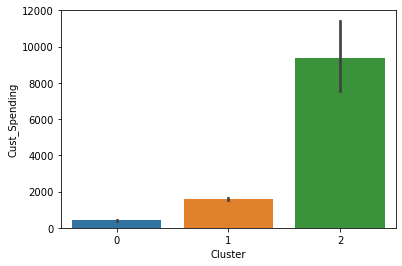

In [23]:
sns.barplot(data=data,y='Cust_Spending',x='Cluster')

<AxesSubplot:xlabel='Cluster', ylabel='Cust_Recency'>

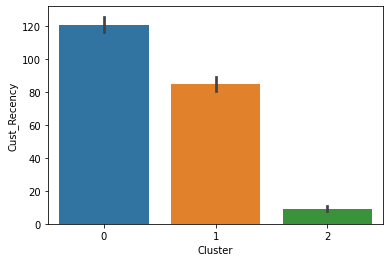

In [25]:
sns.barplot(data=data,y='Cust_Recency',x='Cluster')

<AxesSubplot:xlabel='Cluster', ylabel='Cust_Frequency'>

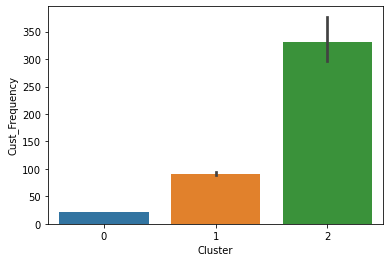

In [26]:
sns.barplot(data=data,y='Cust_Frequency',x='Cluster')

In [27]:
data.groupby('Cluster').mean()

,Cust_Spending,Cust_Frequency,Cust_Recency
Cluster,,,
0,413.348915,21.440543,120.934925
1,1596.798259,91.279040,84.534722
2,9371.945199,331.972393,8.953988


In [29]:
data1 = data.drop('Cluster',axis=1).copy()
data1.head()

,Cust_Spending,Cust_Frequency,Cust_Recency
CustomerID,,,
12346.0,154367.20,2,325
12347.0,4310.00,182,1
12348.0,1797.24,31,74
12349.0,1757.55,73,18
12350.0,334.40,17,309


In [43]:
data1['r_score'] = np.digitize(data1.Cust_Recency,
                               bins=np.percentile(data1.Cust_Recency,
                                                 quantiles),
                              right=True)

In [46]:
data1.r_score.value_counts()

1    904
0    876
4    875
3    860
2    857
Name: r_score, dtype: int64

In [50]:
data1

,Cust_Spending,Cust_Frequency,Cust_Recency,r_score
CustomerID,,,,
12346.0,154367.20,2,325,4
12347.0,4310.00,182,1,0
12348.0,1797.24,31,74,3
12349.0,1757.55,73,18,1
12350.0,334.40,17,309,4
...,...,...,...,...
18280.0,180.60,10,277,4
18281.0,80.82,7,180,4
18282.0,179.50,13,7,0


In [51]:
#inverse the data to match the actual domain scale
data1['r_score'] = 4 - data1['r_score']
data1['m_score'] = np.digitize(data1['Cust_Spending'],
                               bins=np.percentile(data1['Cust_Spending'],quantiles),
                              right=True)
data1['f_score'] = np.digitize(data1['Cust_Frequency'],
                              bins=np.percentile(data1['Cust_Frequency'],quantiles),
                              right=True)

#fix the score scale to 1-5
data1['r_score'] += 1
data1['m_score'] += 1
data1['f_score'] += 1

In [52]:
data1.head()

,Cust_Spending,Cust_Frequency,Cust_Recency,r_score,m_score,f_score
CustomerID,,,,,,
12346.0,154367.20,2,325,1,5,1
12347.0,4310.00,182,1,5,5,5
12348.0,1797.24,31,74,2,4,3
12349.0,1757.55,73,18,4,4,4
12350.0,334.40,17,309,1,2,2


In [55]:
data1['rfm_score'] =  round((data1['r_score'] + data1['f_score'] + data1['m_score']) / 3,2)

In [57]:
data2 = data1.copy()

In [58]:
data2 = data2.drop(['r_score','f_score','m_score'],axis=1)

In [59]:
data2.head()

,Cust_Spending,Cust_Frequency,Cust_Recency,rfm_score
CustomerID,,,,
12346.0,154367.20,2,325,2.33
12347.0,4310.00,182,1,5.00
12348.0,1797.24,31,74,3.00
12349.0,1757.55,73,18,4.00
12350.0,334.40,17,309,1.67


## Agg Clustering Algorithm

In [60]:
clust_pipe = Pipeline(steps=[
    ('impute',SimpleImputer(strategy='mean')),
    ('log1p',log1p_transform),
    ('scale',StandardScaler()),
    ('agg_clust',AgglomerativeClustering(n_clusters=3))
])

In [62]:
clust_label = clust_pipe.fit_predict(data2)
data2['Cluster'] = clust_label

In [135]:
round(data2.groupby('Cluster').mean(),2)

,Cust_Spending,Cust_Frequency,Cust_Recency,rfm_score
Cluster,,,,
0,390.24,20.30,169.20,1.84
1,1835.90,89.66,40.65,3.60
2,10110.99,373.69,5.97,4.85


In [147]:
def get_mean_std(dataframe,column,cluster):
    mean = np.mean(dataframe[column].loc[dataframe['Cluster']==cluster])
    std = np.std(dataframe[column].loc[dataframe['Cluster']==cluster])
    return mean,std

In [158]:
mean0,std0 = get_mean_std(data2,'Cust_Frequency',0)
mean1,std1 = get_mean_std(data2,'Cust_Frequency',1)
mean2,std2 = get_mean_std(data2,'Cust_Frequency',2)

72.12313237635946

In [70]:
data2['Cluster'].value_counts()

1    2018
0    1850
2     504
Name: Cluster, dtype: int64

## Standard deviation comparison on clusterin

In [159]:
np.std(data2.loc[data2['Cluster'] == 2])

Cust_Spending     24131.499863
Cust_Frequency      590.396424
Cust_Recency          7.003196
rfm_score             0.203222
Cluster               0.000000
dtype: float64

In [160]:
np.std(data3.loc[data3['Cluster'] == 2])

Cust_Spending     22238.799671
Cust_Frequency      472.442726
Cust_Recency         12.526682
rfm_score             0.294088
Cluster               0.000000
dtype: float64

In [161]:
np.std(data2.loc[data2['Cluster'] == 0])

Cust_Spending     359.658684
Cust_Frequency     17.052537
Cust_Recency      105.019699
rfm_score           0.546581
Cluster             0.000000
dtype: float64

In [162]:
np.std(data3.loc[data3['Cluster'] == 1])

Cust_Spending     335.838909
Cust_Frequency     16.943939
Cust_Recency      105.201639
rfm_score           0.537990
Cluster             0.000000
dtype: float64

In [163]:
np.std(data2.loc[data2['Cluster'] == 1])

Cust_Spending     8636.180239
Cust_Frequency      72.123132
Cust_Recency        43.843055
rfm_score            0.609956
Cluster              0.000000
dtype: float64

In [164]:
np.std(data3.loc[data3['Cluster'] == 0])

Cust_Spending     4584.521753
Cust_Frequency      53.214684
Cust_Recency        46.502428
rfm_score            0.519317
Cluster              0.000000
dtype: float64

## Kmeans Clustering Algorithm

In [64]:
data3 = data2.copy()

In [71]:
preprocess = Pipeline(steps=[
    ('impute',SimpleImputer()),
    ('log1p',log1p_transform),
    ('scale',StandardScaler()),
    ('Kmeans',KMeans(n_clusters=3,algorithm='elkan'))
])
clust_label = preprocess.fit_predict(data3)

In [72]:
data3['Cluster'] = clust_label

In [136]:
round(data3.groupby('Cluster').mean(),2)

,Cust_Spending,Cust_Frequency,Cust_Recency,rfm_score
Cluster,,,,
0,1393.81,72.88,45.64,3.43
1,379.02,20.09,169.79,1.83
2,7721.74,294.19,10.75,4.69


In [151]:
mean0,std0 = get_mean_std(data3,'Cust_Spending',2)
mean1,std1 = get_mean_std(data3,'Cust_Frequency',2)
mean2,std2 = get_mean_std(data3,'Cust_Recency',2)

In [74]:
data3['Cluster'].value_counts()

1    1834
0    1702
2     836
Name: Cluster, dtype: int64

In [78]:
preprocess.named_steps.Kmeans.inertia_

6507.745017211935

## Algorithm comparison

## Agglomerative Clustering

<AxesSubplot:xlabel='Cluster', ylabel='Cust_Recency'>

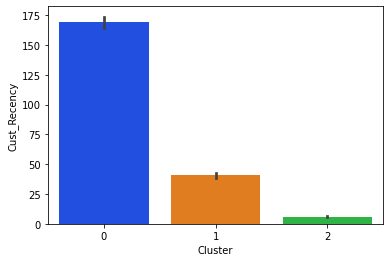

In [134]:
sns.barplot(data=data2, x='Cluster',y='Cust_Recency')
#sns.barplot(data=data3, x='Cluster',y='Cust_Recency')

<AxesSubplot:xlabel='Cluster', ylabel='Cust_Frequency'>

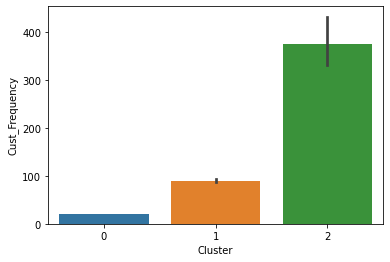

In [95]:
sns.barplot(data=data2, x='Cluster',y='Cust_Frequency')

<AxesSubplot:xlabel='Cluster', ylabel='Cust_Spending'>

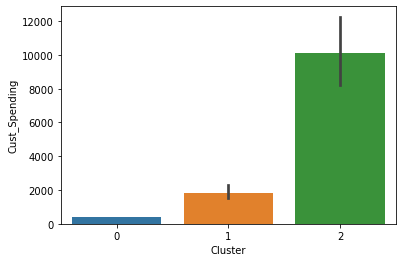

In [96]:
sns.barplot(data=data2, x='Cluster',y='Cust_Spending')

## Kmeans Clustering

<AxesSubplot:xlabel='Cluster', ylabel='Cust_Recency'>

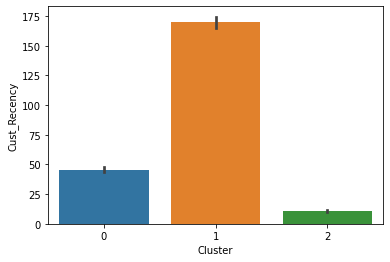

In [97]:
#data 3 with Kmeans
sns.barplot(data=data3, x='Cluster',y='Cust_Recency')

<AxesSubplot:xlabel='Cluster', ylabel='Cust_Frequency'>

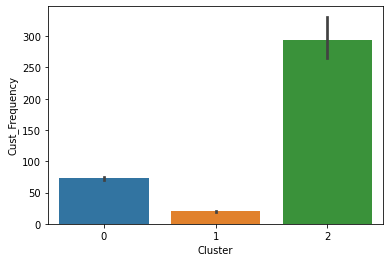

In [98]:
sns.barplot(data=data3, x='Cluster',y='Cust_Frequency')

<AxesSubplot:xlabel='Cluster', ylabel='Cust_Spending'>

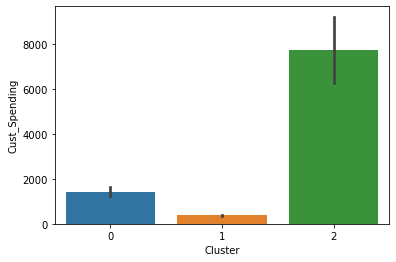

In [99]:
sns.barplot(data=data3, x='Cluster',y='Cust_Spending')